In [329]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn import tree

import graphviz 

In [330]:
df = pd.read_csv('train75.csv')
df.info



<bound method DataFrame.info of                  l_names l_team18 l_pos18  l_gp18  l_points18  draft_pick  \
0         Brandon LaFell      Oak      WR       6   46.000000         NaN   
1        Lance Kendricks       NE      TE      16   47.330002         NaN   
2           Cody Kessler      Phi      QB       5   47.660000         NaN   
3    James O'Shaughnessy      Jax      TE      14   48.270000         NaN   
4         D.J. Chark Jr.      Jax      WR      11   48.400002         NaN   
..                   ...      ...     ...     ...         ...         ...   
166      DeAndre Hopkins      Hou      WR      16  384.100010        31.0   
167      Ezekiel Elliott      Dal      RB      15  400.200010         1.0   
168         Alvin Kamara       NO      RB      15  419.370000        38.0   
169       Todd Gurley II      LAR      RB      14  422.769990         7.0   
170       Saquon Barkley      NYG      RB      16  427.769990        15.0   

     cost l_team17 l_pos17  l_gp17  ...  pi

In [331]:
df = df.drop(columns=['cost','cost17','draft_pick','l_owners17','pick17','train','l_2pt17'])

In [332]:
df_wr = df[df.l_pos18 == "WR"]
df_rb = df[df.l_pos18 == "RB"]
df_qb = df[df.l_pos18 == "QB"]
df_te = df[df.l_pos18 == "TE"]

df_wrte = pd.concat([df_wr, df_te])



df_wrte=df_wrte.dropna()
df_rb=df_rb.dropna()
df_qb=df_qb.dropna()
df_te=df_te.dropna()




In [333]:
# create set of variables to pass to PCA, x's only / exclude Y
vars = ['l_points17','l_gp17','l_actual17','l_passyds17','l_passtd17','l_passint17','l_rushyds17','l_rushtd17','l_rush1st17','l_recepts17','l_recyds17','l_rectd17','l_rec1st17','l_returnyds17','l_returntd17','l_fumble17','off_passydsg17','off_runydsg17']
x_wrte = df_wrte[vars]
y_wrte = df_wrte[['l_points18']]

x_qb = df_qb[vars]
y_qb = df_qb[['l_points18']]

x_rb = df_rb[vars]
y_rb = df_rb[['l_points18']]



(array([40., 38., 26., 20., 15.,  9.,  7.,  7.,  5.,  4.]),
 array([ 46.      ,  84.176999, 122.353998, 160.530997, 198.707996,
        236.884995, 275.061994, 313.238993, 351.415992, 389.592991,
        427.76999 ]),
 <BarContainer object of 10 artists>)

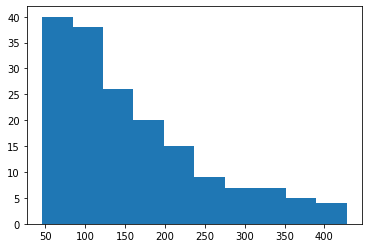

In [334]:
plt.hist(df.l_points18) 

In [335]:
print(df.l_points18.mean())
print(df.l_points18.median())
df.l_points18.std

157.3364918888889
133.47


<bound method NDFrame._add_numeric_operations.<locals>.std of 0       46.000000
1       47.330002
2       47.660000
3       48.270000
4       48.400002
          ...    
166    384.100010
167    400.200010
168    419.370000
169    422.769990
170    427.769990
Name: l_points18, Length: 171, dtype: float64>

In [336]:
x_wrte_norm = StandardScaler().fit_transform(x_wrte)
x_qb_norm = StandardScaler().fit_transform(x_qb)
x_rb_norm = StandardScaler().fit_transform(x_rb)



In [337]:
def numPCA(x,v):
    pca = PCA(.90)
    model = pca.fit(StandardScaler().fit_transform(x[v]))
    n_pcs = pca.n_components_
        # LIST COMPREHENSION HERE
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
    #print(model.components_)
    initial_feature_names = v
    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df2 = pd.DataFrame(dic.items())
    print (n_pcs)
    print (pca.explained_variance_ratio_)
    #print(df2)
    return  df2

vpass =[]
for i in df.columns.tolist():
    if ('td') in i:
        vpass.append(i)

In [338]:
abcde= numPCA(x_wrte,vpass)


3
[0.38476426 0.3365185  0.27871724]


In [339]:
numPCA(x_qb,vars)



5
[0.35699219 0.28955011 0.16288295 0.0888593  0.05076722]


,0,1
0,PC0,l_rush1st17
1,PC1,off_passydsg17
2,PC2,l_gp17
3,PC3,l_actual17
4,PC4,l_actual17


In [340]:
numPCA(x_rb,vars)


6
[0.4072918  0.2194014  0.11510606 0.08356412 0.05315177 0.03926797]


,0,1
0,PC0,l_points17
1,PC1,l_passtd17
2,PC2,off_passydsg17
3,PC3,l_fumble17
4,PC4,off_runydsg17
5,PC5,off_passydsg17


In [341]:
wrte = ['l_points17','l_rushyds17','l_returntd17','l_passint17','l_passyds17','l_fumble17','l_gp17','l_rushtd17','l_rectd17','l_actual17','l_returntd17']
qb = ['l_rushyds17','l_passyds17','l_gp17','l_actual17','l_fumble17','l_passint17','l_gp17']
rb = ['l_points17','l_passtd17','l_rushyds17','l_fumble17','l_gp17','l_rectd17','l_returntd17','l_fumble17','l_rushtd17']
x_wrte = x_wrte[wrte]
x_qb = x_qb[qb]
x_rb = x_rb[rb]

In [342]:
#SPLIT

x_wrte_train, x_wrte_test, y_wrte_train, y_wrte_test = train_test_split(x_wrte, y_wrte, test_size=0.25, random_state=13)
print (x_wrte_train.shape, y_wrte_train.shape)
print (x_wrte_test.shape, y_wrte_test.shape)

x_rb_train, x_rb_test, y_rb_train, y_rb_test = train_test_split(x_rb, y_rb, test_size=0.25, random_state=13)
print (x_rb_train.shape, y_rb_train.shape)
print (x_rb_test.shape, y_rb_test.shape)

x_qb_train, x_qb_test, y_qb_train, y_qb_test = train_test_split(x_qb, y_qb, test_size=0.25, random_state=13)
print (x_qb_train.shape, y_qb_train.shape)
print (x_qb_test.shape, y_qb_test.shape)

(56, 11) (56, 1)
(19, 11) (19, 1)
(21, 9) (21, 1)
(8, 9) (8, 1)
(6, 7) (6, 1)
(3, 7) (3, 1)


In [343]:

def lin (x_train, x_test, y_train, y_test,df,df2,vars):
    # try both linear and polynomial of different degrees
    linear_model = LinearRegression(normalize=True)
    lin_1 = linear_model.fit(x_train, y_train)
    lin1_predict = lin_1.predict(x_test)
    print('cross val for test set')
    lin_score=np.mean(cross_val_score(linear_model, df[vars],df2, cv=3))
    print("lin score", lin_score)
    print('MSE for test set')
    print('MSE: lin ', mean_squared_error(lin1_predict, y_test))
    
    coefs = lin_1.coef_[lin_1.coef_ > .000001]
    equation_dict = {}
    print(f'Equation:')
    for i in range(len(coefs[:-1])):
        print(f'{round(coefs[i], 2)}{vars[i]}', end=' + ')
        equation_dict[coefs[i]] = vars[i]
    print(f'{round(coefs[-1], 2)}{vars[-1]}')
    equation_dict[coefs[-1]] = vars[-1]
   
        
        
        
print("\nwr and te players\n")       
lin(x_wrte_train, x_wrte_test, y_wrte_train, y_wrte_test,x_wrte,y_wrte,wrte) 
print("\n\nqb players")       
lin(x_qb_train, x_qb_test, y_qb_train, y_qb_test,x_qb,y_qb,qb) 
print("\n\nrb players")       
lin(x_rb_train, x_rb_test, y_rb_train, y_rb_test,x_rb,y_rb,rb) 



wr and te players

cross val for test set
lin score -4.580696142628454
MSE for test set
MSE: lin  3465.491399510602
Equation:
1.08l_points17 + 42.64l_rushyds17 + 37.01l_returntd17 + 0.1l_passint17 + 42.64l_returntd17


qb players
cross val for test set
lin score -123.73402834264412
MSE for test set
MSE: lin  63393.91312097042
Equation:
0.19l_rushyds17 + 3.48l_gp17


rb players
cross val for test set
lin score -15.417837835545626
MSE for test set
MSE: lin  15637.77651966461
Equation:
0.31l_points17 + 18.0l_passtd17 + 39.41l_rushyds17 + 340.04l_fumble17 + 18.0l_rushtd17


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

Decision tree part




wr and te players
cross val for test set
dt score -20.893019834916522
MSE for test set
MSE: dt  6351.907462049539
R2: dt  0.1991641792259532
MAE: dt  69.410003
RMSE: dt  79.69885483524553


[Text(0.6015969162995595, 0.9583333333333334, 'X[0] <= 225.95\nsquared_error = 7993.236\nsamples = 56\nvalue = 155.696'),
 Text(0.3794052863436123, 0.875, 'X[9] <= 179.5\nsquared_error = 4318.661\nsamples = 44\nvalue = 125.339'),
 Text(0.14537444933920704, 0.7916666666666666, 'X[5] <= 1.5\nsquared_error = 4655.814\nsamples = 10\nvalue = 165.163'),
 Text(0.09691629955947137, 0.7083333333333334, 'X[9] <= 111.5\nsquared_error = 3582.461\nsamples = 8\nvalue = 186.179'),
 Text(0.05286343612334802, 0.625, 'X[1] <= 22.0\nsquared_error = 588.987\nsamples = 3\nvalue = 135.153'),
 Text(0.03524229074889868, 0.5416666666666666, 'X[8] <= 6.5\nsquared_error = 20.385\nsamples = 2\nvalue = 152.115'),
 Text(0.01762114537444934, 0.4583333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 156.63'),
 Text(0.05286343612334802, 0.4583333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 147.6'),
 Text(0.07048458149779736, 0.5416666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 101.23'),
 Text(

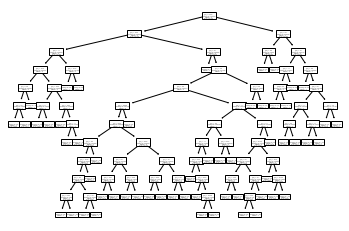

In [344]:
#code decision tree for the  wr and te players
print("\n\n\nwr and te players")       
dt = tree.DecisionTreeRegressor(random_state = 13)
dt.fit(x_wrte_train, y_wrte_train)
dt_predict = dt.predict(x_wrte_test)
print('cross val for test set')
dt_score=np.mean(cross_val_score(dt, x_wrte,y_wrte, cv=5))
print("dt score", dt_score)
print('MSE for test set')
print('MSE: dt ', mean_squared_error(dt_predict, y_wrte_test))
print('R2: dt ', r2_score(dt_predict, y_wrte_test))
print('MAE: dt ', mean_absolute_error(dt_predict, y_wrte_test))
print('RMSE: dt ', np.sqrt(mean_squared_error(dt_predict, y_wrte_test)))


tree.plot_tree(dt)





rb players
cross val for test set
dt score -100.40304357953296
MSE for test set
MSE: dt  7881.236154795039
R2: dt  0.2522916137147059
MAE: dt  73.483751125
RMSE: dt  88.77632654483423


[Text(0.49107142857142855, 0.95, 'X[0] <= 358.62\nsquared_error = 8267.464\nsamples = 21\nvalue = 182.57'),
 Text(0.43392857142857144, 0.85, 'X[2] <= 234.0\nsquared_error = 5736.928\nsamples = 20\nvalue = 170.73'),
 Text(0.2642857142857143, 0.75, 'X[0] <= 33.75\nsquared_error = 644.145\nsamples = 2\nvalue = 271.35'),
 Text(0.20714285714285716, 0.65, 'squared_error = 0.0\nsamples = 1\nvalue = 296.73'),
 Text(0.32142857142857145, 0.65, 'squared_error = -0.0\nsamples = 1\nvalue = 245.97'),
 Text(0.6035714285714285, 0.75, 'X[0] <= 231.015\nsquared_error = 5052.856\nsamples = 18\nvalue = 159.549'),
 Text(0.4357142857142857, 0.65, 'X[8] <= 4.5\nsquared_error = 1861.9\nsamples = 14\nvalue = 141.716'),
 Text(0.2714285714285714, 0.55, 'X[8] <= 1.5\nsquared_error = 1366.066\nsamples = 12\nvalue = 152.124'),
 Text(0.11428571428571428, 0.45, 'X[3] <= 0.5\nsquared_error = 0.608\nsamples = 2\nvalue = 119.25'),
 Text(0.05714285714285714, 0.35, 'squared_error = 0.0\nsamples = 1\nvalue = 118.47'),
 Tex

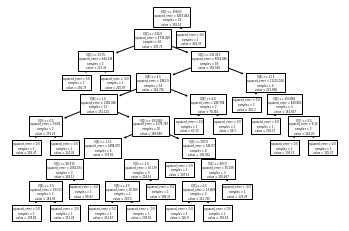

In [345]:
#code decision tree for the  rb players
print("\n\n\nrb players")       
dt = tree.DecisionTreeRegressor(random_state = 13)
dt.fit(x_rb_train, y_rb_train)
dt_predict = dt.predict(x_rb_test)
print('cross val for test set')
dt_score=np.mean(cross_val_score(dt, x_rb,y_rb, cv=5))
print("dt score", dt_score)
print('MSE for test set')
print('MSE: dt ', mean_squared_error(dt_predict, y_rb_test))
print('R2: dt ', r2_score(dt_predict, y_rb_test))
print('MAE: dt ', mean_absolute_error(dt_predict, y_rb_test))
print('RMSE: dt ', np.sqrt(mean_squared_error(dt_predict, y_rb_test)))

tree.plot_tree(dt)





qb players
cross val for test set
dt score -24.498545269947947
MSE for test set
MSE: dt  3053.891216733367
R2: dt  -0.7826953997894741
MAE: dt  49.229996666666665
RMSE: dt  55.26202327759423


[Text(0.4444444444444444, 0.9, 'X[4] <= 0.5\nsquared_error = 5229.833\nsamples = 6\nvalue = 268.66'),
 Text(0.3333333333333333, 0.7, 'squared_error = 0.0\nsamples = 1\nvalue = 147.1'),
 Text(0.5555555555555556, 0.7, 'X[5] <= 11.5\nsquared_error = 2729.36\nsamples = 5\nvalue = 292.972'),
 Text(0.3333333333333333, 0.5, 'X[5] <= 7.5\nsquared_error = 791.802\nsamples = 3\nvalue = 318.68'),
 Text(0.2222222222222222, 0.3, 'X[0] <= 149.5\nsquared_error = 214.623\nsamples = 2\nvalue = 300.67'),
 Text(0.1111111111111111, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 315.32'),
 Text(0.3333333333333333, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 286.02'),
 Text(0.4444444444444444, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 354.7'),
 Text(0.7777777777777778, 0.5, 'X[5] <= 15.5\nsquared_error = 3157.317\nsamples = 2\nvalue = 254.41'),
 Text(0.6666666666666666, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 198.22'),
 Text(0.8888888888888888, 0.3, 'squared_error = 0.0\nsamples = 1\nvalu

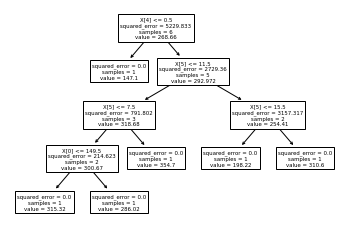

In [346]:
#code decision tree for the  qb players
print("\n\n\nqb players")       
dt = tree.DecisionTreeRegressor(random_state = 13)
dt.fit(x_qb_train, y_qb_train)
dt_predict = dt.predict(x_qb_test)
print('cross val for test set')
dt_score=np.mean(cross_val_score(dt, x_qb,y_qb, cv=2))
print("dt score", dt_score)
print('MSE for test set')
print('MSE: dt ', mean_squared_error(dt_predict, y_qb_test))
print('R2: dt ', r2_score(dt_predict, y_qb_test))
print('MAE: dt ', mean_absolute_error(dt_predict, y_qb_test))
print('RMSE: dt ', np.sqrt(mean_squared_error(dt_predict, y_qb_test)))

tree.plot_tree(dt)

